In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TimePass

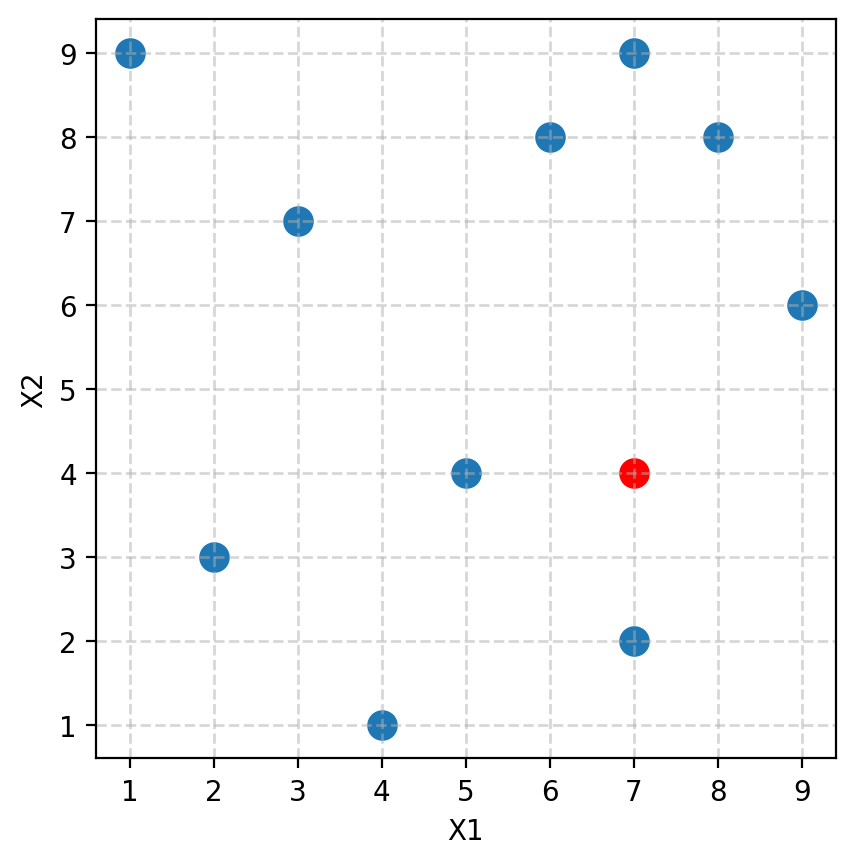

In [107]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    

plot_dataset()

In [6]:
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

X[indices], distances

(array([[[5, 4],
         [7, 2]]]),
 array([[2., 2.]]))

In [7]:
def pairwise_dist(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

In [8]:
def distance_vector_(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    n, d = X.shape
    distances = np.zeros(n)
    for i in range(n):
        distances[i] = pairwise_dist(X[i], query_pt)
    #output the nearest point
    minimum_distance = np.min(distances)
    min_array = []
    for i in range(n):
        if distances[i] == minimum_distance:
            min_array.append(X[i])
    return min_array, sorted(distances)

In [22]:
def distance_vector(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    # Calculate distances using vectorized operations
    distances = np.linalg.norm(X - query_pt, axis=1)
    
    # Find minimum distance and corresponding points
    min_distance = np.min(distances)
    min_indices = np.where(distances == min_distance)[0]
    min_points = X[min_indices]
    
    return min_points, distances

In [23]:
# Test that the function is correct by comparing to sklearn
min_array, distances_naive = distance_vector(X, query_pt)
print(min_array)
print(type(min_array))

[[5 4]
 [7 2]]
<class 'numpy.ndarray'>


In [27]:
# Find all distances from query_pt to all points in X using sklearn
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn == np.sort(distances_naive))

[[ True  True  True  True  True  True  True  True  True  True]]


# Naive KNN

In [60]:
def naive_KNN(X: np.ndarray, query_pt: np.ndarray, k = 1, Y = None):

    '''
    X is training data                           : (n,d)
    query_pt is new point from test data         : (d,)
    Y stores the class values corresponding to X : (n,)  : for classification (optional)
    k is the number of nearest neighbors to consider
    '''

    if query_pt.ndim == 1:
        query_pt = query_pt.reshape(1, -1)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    assert X.shape[1] == query_pt.shape[0] and X.shape[0] == Y.shape[0]

    distances = np.linalg.norm(X - query_pt, axis=1)

    sorted_indices = np.argsort(distances)
    # print(sorted_indices)
    k_nearest = sorted_indices[:k]
    # print(k_nearest)

    if Y is not None:
        k_nearest_classes = Y[k_nearest]
        counts = np.bincount(k_nearest_classes)
        predicted_class = np.argmax(counts)
        return k_nearest, X[k_nearest], distances[k_nearest], predicted_class
    else:
        return k_nearest, X[k_nearest], distances[k_nearest]

In [59]:
X = np.array([1,2,3,5,6,7])
Y = np.array([1,0,1,1,0,1])

naive_KNN(X, np.array([4.1]), 2, Y)

[3 2 4 1 5 0]
[3 2]


(array([3, 2], dtype=int64),
 array([[5],
        [3]]),
 array([0.9, 1.1]),
 1)

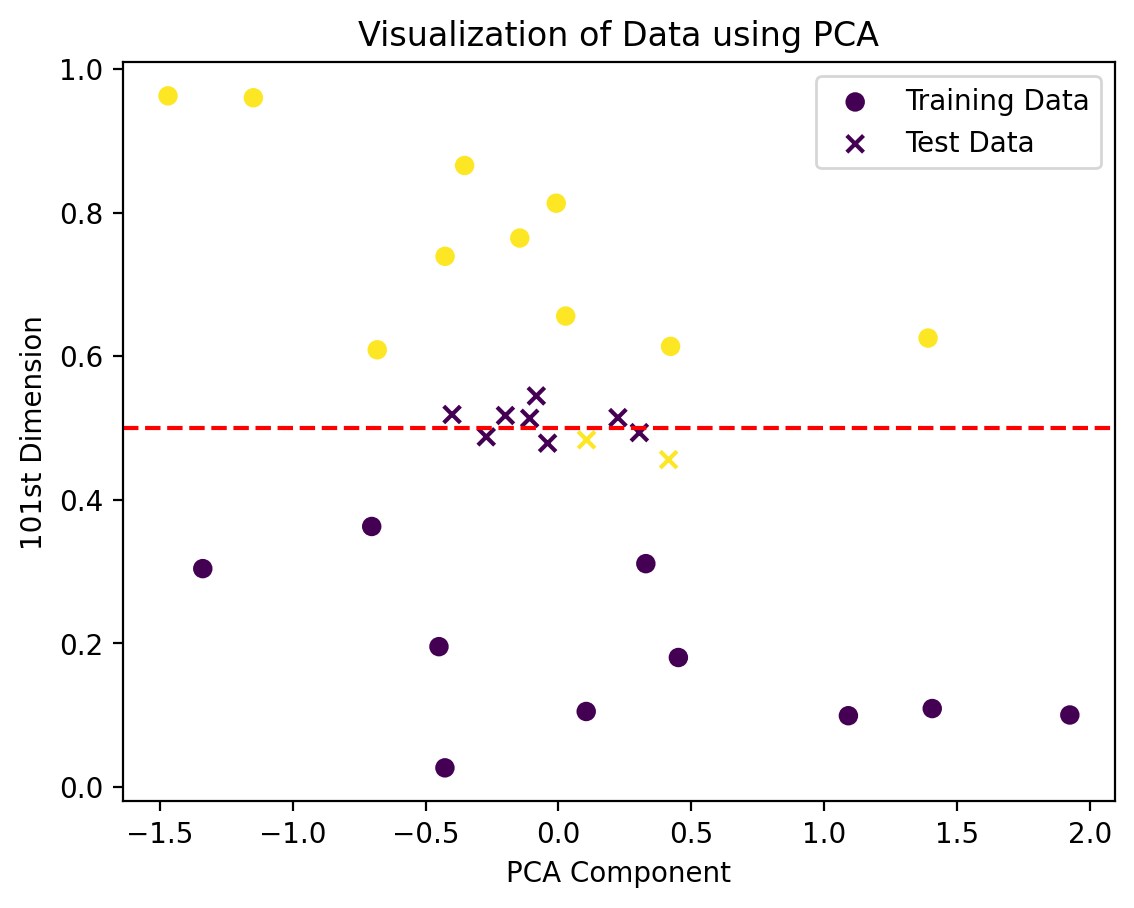

In [95]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducibility
np.random.seed(42)

# Create the training data
X_train = np.random.rand(20, 100)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

# Create the test data
X_test = np.random.rand(10, 100)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, :-1], y_train)  # Excluding the final dimension
y_train_pred = knn.predict(X_train[:, :-1])  # Excluding the final dimension
y_test_pred = knn.predict(X_test[:, :-1])  # Excluding the final dimension

# Perform PCA on the training data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train[:, :-1])  # Excluding the final dimension
X_test_pca = pca.transform(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train_pca, X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test_pca, X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('PCA Component')
plt.ylabel('101st Dimension')
plt.title('Visualization of Data using PCA')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# Reset the random seed to avoid affecting other parts of the code
np.random.seed()

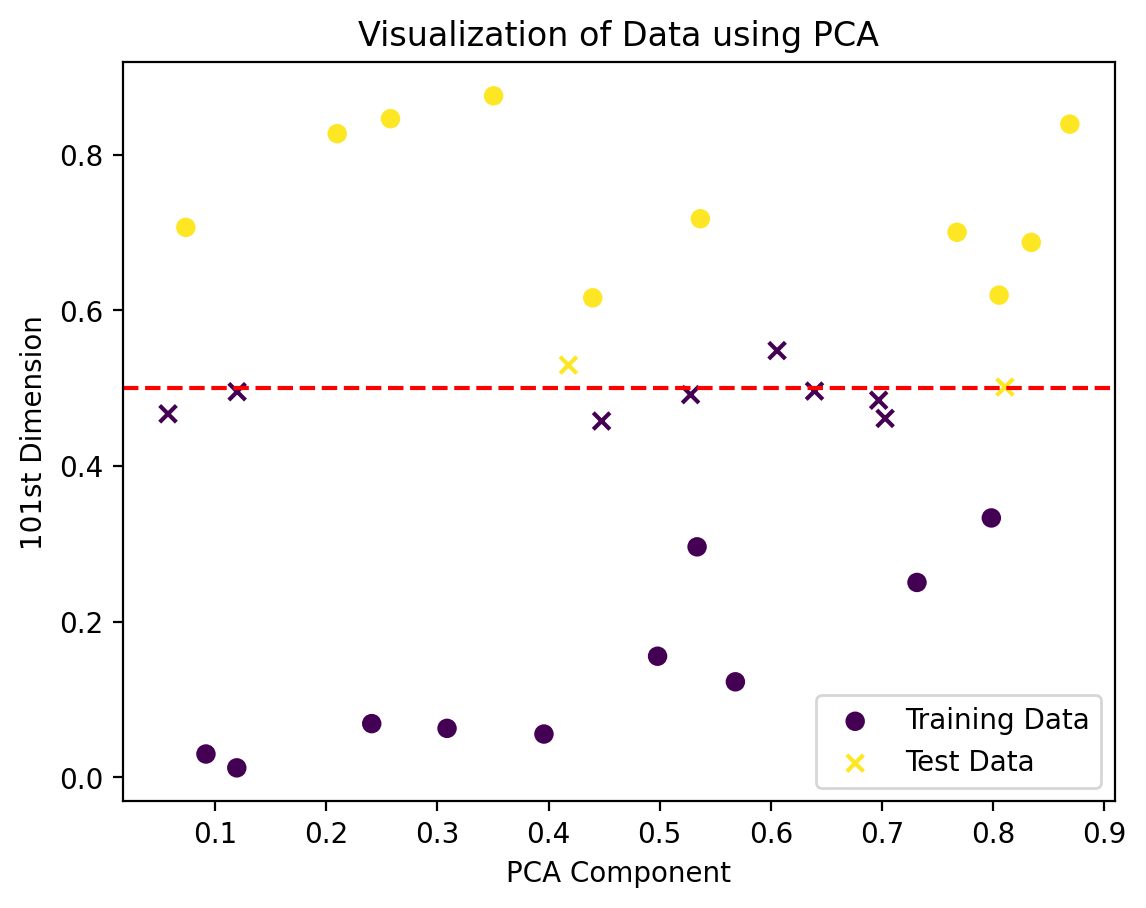

In [85]:
# Create the training data
X_train = np.random.rand(20, 2)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

# Create the test data
X_test = np.random.rand(10, 2)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, :-1], y_train)  # Excluding the final dimension
y_train_pred = knn.predict(X_train[:, :-1])  # Excluding the final dimension
y_test_pred = knn.predict(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Visualization of 2d-Data')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# KD - Tree

In [103]:
class Node:
    def __init__(self, point, axis, left=None, right=None):
        self.point = point
        self.axis = axis
        self.left = left
        self.right = right

In [201]:
class KD_tree:
    def __init__(self, points, classes, k, leaf_size = None, max_depth = None):

        assert points.shape[0] > k

        self.k = k
        self.min_points = leaf_size
        self.max_depth = max_depth

        self.X = points
        self.Y = classes

        self.root = self.__build_kdtree(points)

    def __build_kdtree(self, points, depth=0, axes = None):

        if depth == 0:
            # print(points.shape)
            dim = points.shape[1]
            if self.max_depth is None:
                self.max_depth = dim
            else:
                self.max_depth = min(dim, self.max_depth)

            if self.min_points is None:
                self.min_points = k
            else:
                self.min_points = max(k, self.min_points)

            axes = list(range(points.shape[1]))

            # print(self.min_points)
            # print(self.max_depth)
            # print()

        if len(points) == 0:
            return None
        
        if depth == self.max_depth:
            return Node(
                point = None,
                axis  = None,
                left  = None,
                right = None
            )

        for p_axis in axes:

            sorted_points = sorted(points, key=lambda x: x[p_axis])
            median_value = self.__calculate_median(sorted_points, p_axis)

            print("Depth:", depth, "Median:", median_value, "Axis:", p_axis)

            left_points = [point for point in sorted_points if point[p_axis] < median_value]
            right_points = [point for point in sorted_points if point[p_axis] >= median_value]

            if len(left_points) < self.min_points or len(right_points) < self.min_points:
                continue

            # print(depth)
            # print(left_points)
            # print(right_points)
            # print()

            child_axes = axes.copy()
            child_axes.remove(p_axis)

            return Node(
                point = median_value,
                axis  = p_axis,
                left  = self.__build_kdtree(left_points, depth + 1, axes=child_axes),
                right = self.__build_kdtree(right_points, depth + 1, axes=child_axes)
            )
        
        return Node(
            point = None,
            axis  = None,
            left  = None,
            right = None
        )

    def __calculate_median(self, sorted_points, axis):
        n = len(sorted_points)
        if n % 2 == 0:
            return (sorted_points[n // 2 - 1][axis] + sorted_points[n // 2][axis]) / 2
        else:
            return sorted_points[n // 2][axis]
        
    def get_nearest_neighbours(self, query_point):

        assert self.X.shape[1] == query_point.shape[0]

        def traverse_tree(node, subset_X, subset_Y):
            if node is None or node.point is None:
                return subset_X, subset_Y

            if query_point[node.axis] < node.point:
                return traverse_tree(node.left, subset_X[subset_X[:, node.axis] < node.point], subset_Y[subset_X[:, node.axis] < node.point])
            else:
                return traverse_tree(node.right, subset_X[subset_X[:, node.axis] >= node.point], subset_Y[subset_X[:, node.axis] >= node.point])

        subset_X, subset_Y = traverse_tree(self.root, self.X.copy(), self.Y.copy())
        return subset_X, subset_Y
    
    def predict_class(self, query_point):
        _ , nearest_classes = self.get_nearest_neighbours(query_point)

        assert len(nearest_classes) != 0

        unique_classes, class_counts = np.unique(nearest_classes, return_counts=True)
        max_count_idx = np.argmax(class_counts)
        return unique_classes[max_count_idx]

### some testing

In [113]:
a = KD_tree(X,1)
a.__calculate_median__

(10, 2)


<bound method KD_tree.__calculate_median__ of <__main__.KD_tree object at 0x000001278ECA9000>>

In [117]:
b = KD_tree(X,1)
b.__build_kdtree

(10, 2)


AttributeError: 'KD_tree' object has no attribute '__build_kdtree'

In [147]:
X = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15], [7,12,14]])
Y = np.array([1,1,0,0,1,0])
q = np.array([2,5,7])

X.shape , Y.shape , q.shape

((6, 3), (6,), (3,))

In [164]:
d = KD_tree(X,Y,1)

2
3

0
[array([1, 2, 3]), array([4, 5, 6])]
[array([7, 8, 9]), array([ 7, 12, 14]), array([10, 11, 12]), array([13, 14, 15])]

1
[array([7, 8, 9]), array([10, 11, 12])]
[array([ 7, 12, 14]), array([13, 14, 15])]



In [144]:
q = np.array([2,5])
d.get_nearest_neighbours(q)

AssertionError: 

In [165]:
q = np.array([2,5,7])
d.get_nearest_neighbours(q)

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([1, 1]))

In [166]:
d.predict_class(q)

1

In [168]:
q = np.array([8,5,2])
d.get_nearest_neighbours(q)

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([0, 0]))

In [169]:
d.predict_class(q)

0

In [177]:
np.random.seed(31)

X_train = np.random.rand(20, 100)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

X_test = np.random.rand(10, 100)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

KD = KD_tree(X_train, y_train, 3)
print("Trained!")

y_test_pred = []
for x in X_test:
    # print("\nx = ", x)
    # print(KD.get_nearest_neighbours(x))
    # print(KD.predict_class(x))
    y_test_pred.append(KD.predict_class(x))

y_test_pred

Trained!


[2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0]

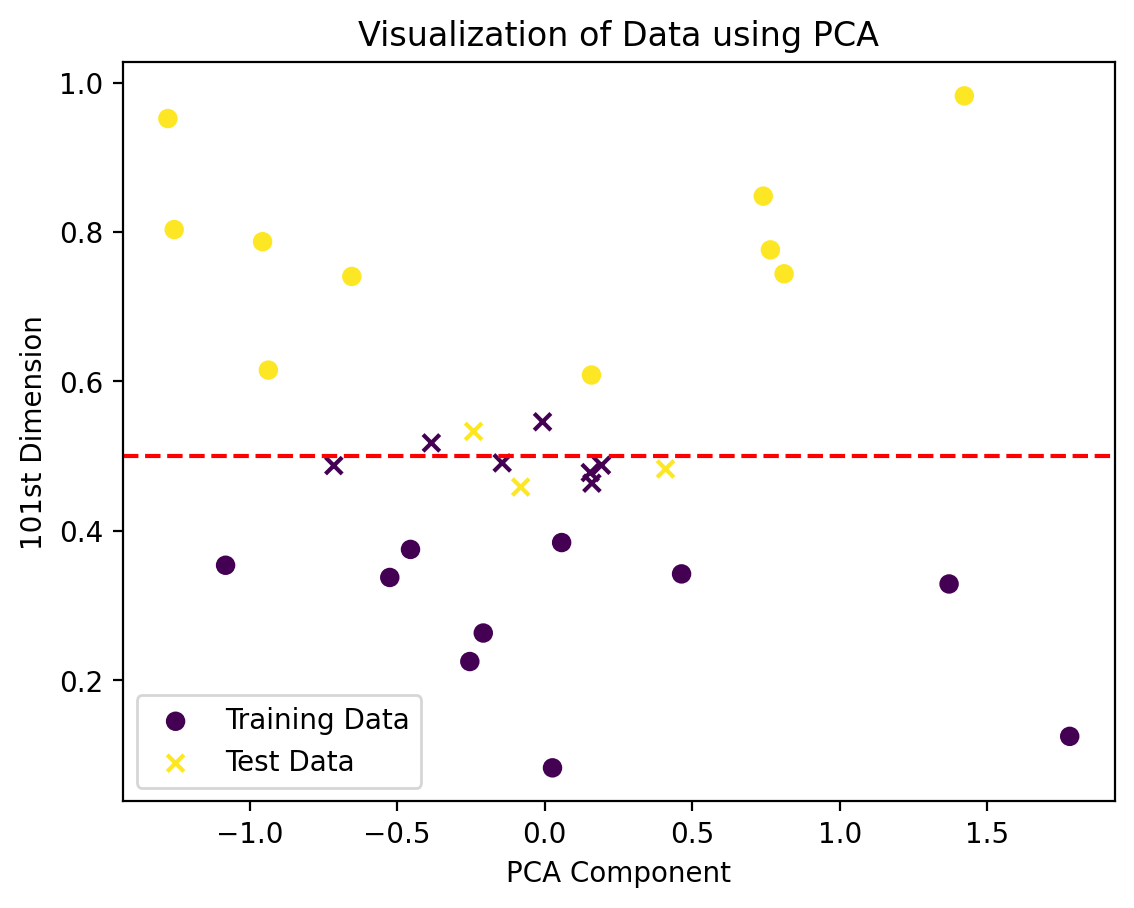

In [178]:
# Perform PCA on the training data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train[:, :-1])  # Excluding the final dimension
X_test_pca = pca.transform(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train_pca, X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test_pca, X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('PCA Component')
plt.ylabel('101st Dimension')
plt.title('Visualization of Data using PCA')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# Reset the random seed to avoid affecting other parts of the code
np.random.seed()

Depth: 0 Median: 0.5850246183373644 Axis: 0
Depth: 1 Median: 0.6180645026887948 Axis: 1
Depth: 1 Median: 0.3718870400708373 Axis: 1
Trained!

x =  [0.55391611 0.474306  ]
(array([[0.30793495, 0.10858028],
       [0.26950525, 0.10710084],
       [0.17974525, 0.18453253],
       [0.2827656 , 0.28023873],
       [0.26969294, 0.18156382],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.27699727, 0.04148372],
       [0.56991727, 0.33354278],
       [0.0967189 , 0.60201772]]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

x =  [0.57356825 0.54386296]
(array([[0.30793495, 0.10858028],
       [0.26950525, 0.10710084],
       [0.17974525, 0.18453253],
       [0.2827656 , 0.28023873],
       [0.26969294, 0.18156382],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.27699727, 0.04148372],
       [0.56991727, 0.33354278],
       [0.0967189 , 0.60201772]]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

x =  [0.98807864 0.48701297]
(arra

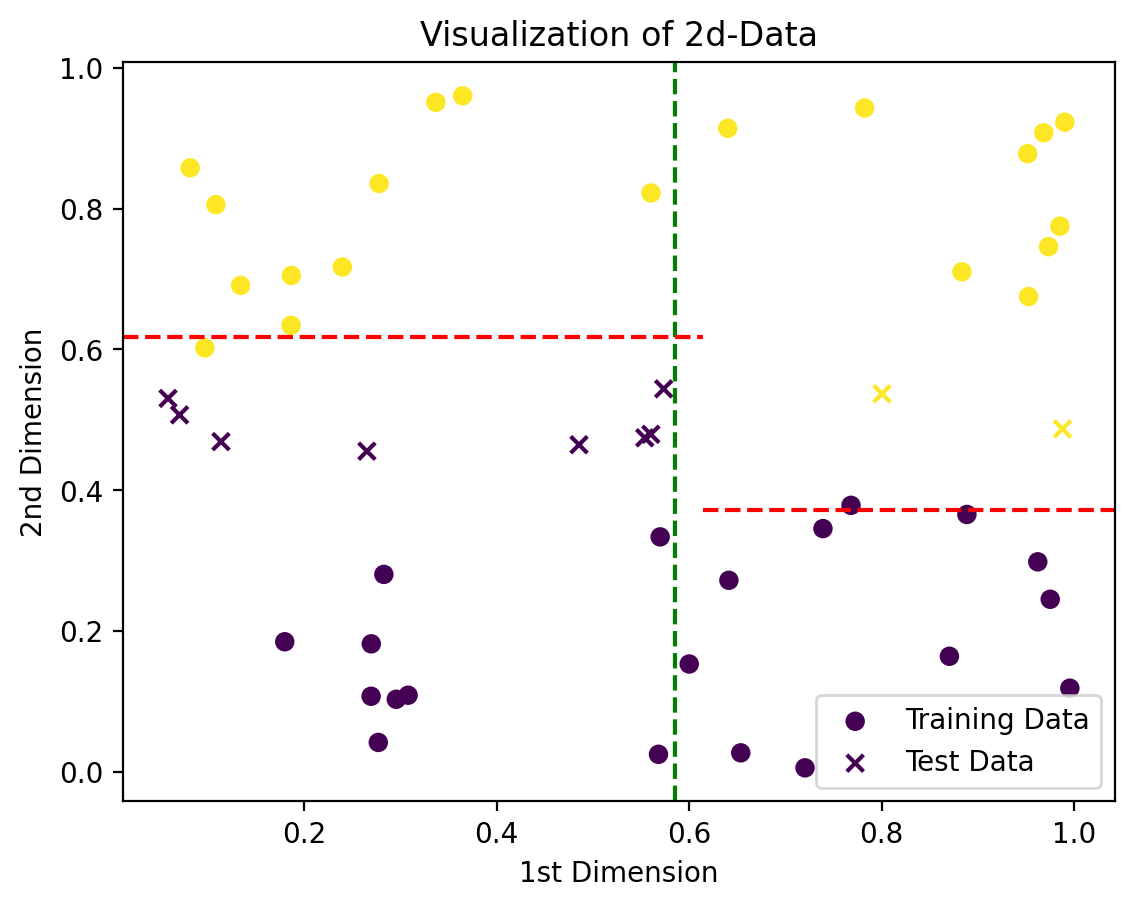

In [204]:
np.random.seed(26)

# Create the training data
X_train = np.random.rand(40, 2)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 20), np.random.uniform(0.6, 1, 20)])
y_train = np.concatenate([np.ones(20), 2*np.ones(20)])

# Create the test data
X_test = np.random.rand(10, 2)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
KD = KD_tree(X_train, y_train, 3)
print("Trained!")

y_test_pred = []
for x in X_test:
    print("\nx = ", x)
    print(KD.get_nearest_neighbours(x))
    y_test_pred.append(KD.predict_class(x))

print(y_test_pred)

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Visualization of 2d-Data')
# plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.5850246183373644, color='g', linestyle='--')
plt.axhline(y=0.6180645026887948, xmin=0, xmax=0.5850246183373644, color='r', linestyle='--')
plt.axhline(y=0.3718870400708373, xmin=0.5850246183373644, xmax=1, color='r', linestyle='--')
plt.legend()
plt.show()

np.random.seed()

In [203]:
def cal_median(sorted_points, axis):
    n = len(sorted_points)
    if n % 2 == 0:
        return (sorted_points[n // 2 - 1][axis] + sorted_points[n // 2][axis]) / 2
    else:
        return sorted_points[n // 2][axis]

sorted_points = sorted(X_train, key=lambda x: x[0])
median_value = cal_median(sorted_points, 0)

left_points = [point for point in sorted_points if point[0] < median_value]
right_points = [point for point in sorted_points if point[0] >= median_value]

sorted_points_1 = sorted(left_points, key=lambda x: x[1])
median_value_1 = cal_median(sorted_points_1, 1)

sorted_points_2 = sorted(right_points, key=lambda x: x[1])
median_value_2 = cal_median(sorted_points_2, 1)

median_value , median_value_1 , median_value_2

(0.5850246183373644, 0.6180645026887948, 0.3718870400708373)